In [1]:
import matplotlib.pyplot as plt

def save2poster(name, BBoxInches='tight'):
    plt.savefig('D:/UNM/24Summer/poster/Fig/'+name, bbox_inches = BBoxInches)

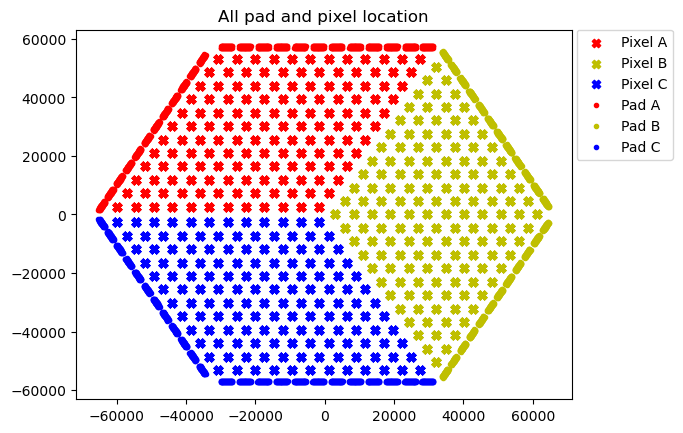

In [7]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd


#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']

#use _A _B _C for grouping the pixel
Pixel_x_A = []
Pixel_y_A = []
Pixel_x_B = []
Pixel_y_B = []
Pixel_x_C = []
Pixel_y_C = []

# try use same method above by Pad X center,Pad Y center
# pad_x_center = data['Pad X center']
# pad_y_center = data['Pad Y center']

pad_x_center_A = []
pad_y_center_A = []
PXCB = []
PYCB = []
PXCC = []
PYCC = []


for i in range(len(data)):
    
    if data['Group Section'][i] == 'A':
        
        Pixel_x_A.append(int(data['Pixel X center'][i]))
        Pixel_y_A.append(int(data['Pixel Y center'][i]))
        pad_x_center_A.append(int(data['Pad X center'][i]))
        pad_y_center_A.append(int(data['Pad Y center'][i]))
    
    if data['Group Section'][i] == 'B':
        
        Pixel_x_B.append(int(data['Pixel X center'][i]))
        Pixel_y_B.append(int(data['Pixel Y center'][i]))
        PXCB.append(int(data['Pad X center'][i]))
        PYCB.append(int(data['Pad Y center'][i]))

    if data['Group Section'][i] == 'C':
        
        Pixel_x_C.append(int(data['Pixel X center'][i]))
        Pixel_y_C.append(int(data['Pixel Y center'][i]))
        PXCC.append(int(data['Pad X center'][i]))
        PYCC.append(int(data['Pad Y center'][i]))


plt.scatter(Pixel_x_A, Pixel_y_A, c='r', marker='X', label='Pixel A')
plt.scatter(Pixel_x_B, Pixel_y_B, c='y', marker='X', label='Pixel B')
plt.scatter(Pixel_x_C, Pixel_y_C, c='b', marker='X', label='Pixel C')

plt.scatter(pad_x_center_A, pad_y_center_A, c='r', marker='.', label='Pad A')
plt.scatter(PXCB, PYCB, c='y', marker='.', label='Pad B')
plt.scatter(PXCC, PYCC, c='b', marker='.', label='Pad C')
plt.title("All pad and pixel location")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.savefig('D:/UNM/24Summer/QuReseach/poster/Fig/all pp.svg', bbox_inches = "tight")
plt.show()

#this plot show the wafer location in the plot

In [ ]:
# goal 1 Ver2.1
# update the may logiacal error for distance calculation in Ver2

""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""
# it is vert important to keep index same 
#Index help: 
    # Grouptype is 0; GroupIndex is 1; Group Section is 2; pad label is 3
    # Pad X center is 6; Pad Y center is 7; 
    # Pixel X center is 4; Pixel Y center is 5


get_columns = ['Grouptype','GroupIndex','Group Section','Pad Label',
                   'Pixel X center', 'Pixel Y center', 
                   'Pad X center', 'Pad Y center']
data_goal1 = data[get_columns]

GrouptypeIndex = 0
GroupIndexIndex = 1
GroupSectionIndex = 2
PadLabelIndex = 3
PixelXIndex = 4
PixelYIndex = 5
PadXIndex = 6
PadYIndex = 7

data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

goal1 = [],[],[]
#save dis and all pad info to goal1

#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

except_total_data = []
group_number = 0

for j in range(len(unique_pixel_x)):

    group_data = []

    y_pixel_in_group = []

    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])
            y_pixel_in_group.append(data_goal1[i][PixelYIndex])
    #print(y_pixel_in_group)
    # get pixel y position from group_data
    #group_data = np.array(group_data)
    #y_pixel_in_group = group_data[:,1]
    unique_pixel_y = np.unique(y_pixel_in_group)   
    group_number += len(unique_pixel_y)

    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if y_pixel_in_group[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #calculate the distance between pad for one group

        # save the info about distance is which pad to which 

        # calculate the except total number of distance for each group
        except_total_data.append(length_group_y* (length_group_y -1)/2)
        # except = (len-1) + (len-2) + (len-3) + ... + 1
        # except = (len-1)*len/2


        for i in range(length_group_y):
            for j in range(i+1,length_group_y):
                 
                # save pad info
                first_pad = group_data_y[i]
                #list[start:stop] 
                #extracts elements from start up to but not including stop.
                second_pad = group_data_y[j]
                
                goal1[1].append(first_pad)
                goal1[2].append(second_pad)

                pad_x_distance = group_data_y[i][PadXIndex] - group_data_y[j][PadXIndex]
                pad_y_distance = group_data_y[i][PadYIndex] - group_data_y[j][PadYIndex]
                   
                distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
                distance = round(distance,3) #let distance keep three decimal places
                goal1[0].append(distance)

#show how many data we calculted the distance

print("except total for each group: ",except_total_data)
print("total except: ",sum(except_total_data))
print("unique of except: ",np.unique(except_total_data))
#45 = 9 * len(10) / 2; 28 = 7 * len(8) / 2
print("length of except(group number): ",len(except_total_data))
except_45 = 0
for i in range(len(except_total_data)):
    if except_total_data[i] == 45:
        except_45 += 1
print("how many except is 45: ",except_45," (= 12 * 3)")

distance_goal1 = goal1[0]
print("\n We have ",len(distance_goal1),
      " data \n  max is: ",np.max(distance_goal1),
      "\n  min is: ",np.min(distance_goal1)) 
#print(np.unique(distance_goal1))


In [ ]:
#save histogram data to a file         
#print(len(distance_goal1)) #num ==len(distance_goal1)
num, bins, patches = plt.hist(distance_goal1, bins=1000)
# bins = 100000 need 6m 51s to run

path_filename = f'.\data\goal1 Ver2.1 {len(bins)-1}bins '


#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.title("goal1")
plt.xlabel("distance")
plt.ylabel("number")

plt.savefig(f'{path_filename}.png')  
save2poster('goal1.svg')
plt.show()
#plt.clf() # not show the plot for pad analysis   

# print(np.sum(num)) 
# print(number_of_distance,"\n",sum(number_of_distance)) 
# #check the number of distance is correct   
print("group number is: ",group_number)

#end of goal 1 Ver2.1

In [ ]:
# save goal1 ver2.1 to a file

pad_columns_1st = ['1st '+column for column in get_columns]
pad_columns_2nd = ['2nd '+column for column in get_columns]

column_names = ['distance']\
    +pad_columns_1st\
    +pad_columns_2nd
#[GrouptypeIndex:PadLabelIndex+1]

goal1_dis = np.array(goal1[0])
goal1_first_pad_info = np.array(goal1[1])
goal1_second_pad_info = np.array(goal1[2])

record_change = []
# change distance and recell column names when change the pixel position
for i in range(len(goal1_dis)):
    if i+1 < len(goal1_dis):
        if goal1_dis[i] != -10.110:
            if goal1_first_pad_info[i][PixelXIndex] != goal1_first_pad_info[i+1][PixelXIndex]\
            or goal1_first_pad_info[i][PixelYIndex] != goal1_first_pad_info[i+1][PixelYIndex]:
                
                record_change.append(i+1)

not_real_dis = [-10.110]
 #none dis is - use 10.110 show N(ext) G(roup) form morse code
for i in range(len(record_change)):
    goal1_dis = np.insert(goal1_dis,record_change[i]+i,not_real_dis)
    goal1_first_pad_info = np.insert(goal1_first_pad_info,record_change[i]+i,pad_columns_1st,axis=0)
    goal1_second_pad_info = np.insert(goal1_second_pad_info,record_change[i]+i,pad_columns_2nd,axis=0)


# #limit the info in goal1[1] and goal1[2] to GrouptypeIndex:PadLabelIndex+1
# goal1_first_pad_info = goal1_first_pad_info[:,GrouptypeIndex:PadLabelIndex+1]
# goal1_second_pad_info = goal1_second_pad_info[:,GrouptypeIndex:PadLabelIndex+1]



data_goal1 = np.column_stack((goal1_dis,goal1_first_pad_info,goal1_second_pad_info))
df_goal1 = pd.DataFrame(data_goal1,columns = column_names)
df_goal1.to_csv('.\data\goal1 Ver2.1 all pad pixel info.csv', index=False)  



In [ ]:
#show how many pixel position we have
"""
# Example list of positions
positions = [(1, 2), (2, 3), (1, 2), (4, 5), (2, 3)]

# Step 1: Initialize an empty set
unique_positions = set()

# Step 2: Iterate through the list and add each position to the set
for position in positions:
      unique_positions.add(position)

# Step 4: Get the number of unique positions
num_unique_positions = len(unique_positions)

print(unique_positions)
"""

pixel_positions = []
for i in range(len(data)):
    pixel_positions.append((pixel_x_center[i],pixel_y_center[i]))

#print(pixel_positions)
unique_pixel_positions = set()
for position in pixel_positions:
    unique_pixel_positions.add(position)

len_pixel_positions = len(unique_pixel_positions)

print(unique_pixel_positions)
print("length is: ", len_pixel_positions)

From goal2 way2 we know the distance bigger than 361 is show that two pad is real neighbor    
    less 361 is the one next to each other      
    ????    

In [ ]:
#by check the CSV file I want to see all the pad & pixel info for dis < 361
g1_dis_less_361 = []
g1_1st_info_less_361 = []
g1_2nd_info_less_361 = []

for i in range(len(goal1_dis)):
    if goal1_dis[i] > 0 and goal1_dis[i] < 361:
        g1_dis_less_361.append(goal1_dis[i])
        g1_1st_info_less_361.append(goal1_first_pad_info[i])
        g1_2nd_info_less_361.append(goal1_second_pad_info[i])

g1_dis_less_361 = np.array(g1_dis_less_361)
g1_1st_info_less_361 = np.array(g1_1st_info_less_361)
g1_2nd_info_less_361 = np.array(g1_2nd_info_less_361)

#remove the column I don't need
g1_1st_info_less_361 = g1_1st_info_less_361[:,GrouptypeIndex:PadLabelIndex+1]
g1_2nd_info_less_361 = g1_2nd_info_less_361[:,GrouptypeIndex:PadLabelIndex+1]

col_names_need = ['pad distance']\
    +pad_columns_1st[GrouptypeIndex:PadLabelIndex+1]\
    +pad_columns_2nd[GrouptypeIndex:PadLabelIndex+1]

g1_data_less_361 = np.column_stack((g1_dis_less_361,g1_1st_info_less_361,g1_2nd_info_less_361))
g1_df_less_361 = pd.DataFrame(g1_data_less_361,columns = col_names_need)
g1_df_less_361.to_csv('.\data\goal1 Ver2.1 dis less 361 all info.csv', index=False)


In [ ]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('.\data\goal1 Ver2.1 dis less 361 all info.csv')

# Step 2: Sort the data by 'pad distance' in ascending order (use descending order with ascending=False)
df_sorted = df.sort_values(by='pad distance', ascending=True)

# Optional: Reset the index if you want a clean, sequential index in the new file
df_sorted.reset_index(drop=True, inplace=True)

# Step 3: Write the sorted data to a new CSV file
df_sorted.to_csv('.\data\goal1 Ver2.1 DL361 All Sorted by dis.csv', index=False)

In [ ]:
# goal 2 Ver2.01 update the data type we want to save

# it is vert important to keep index same 

# get_columns = ['Grouptype','GroupIndex','Group Section','Pad Label',
#                    'Pixel X center', 'Pixel Y center', 
#                    'Pad X center', 'Pad Y center']
data_goal2 = data[get_columns]

# GrouptypeIndex = 0 # GroupIndexIndex = 1 # GroupSectionIndex = 2 # PadLabelIndex = 3
# PixelXIndex = 4 # PixelYIndex = 5 # PadXIndex = 6 # PadYIndex = 7

data_goal2 = np.array(data_goal2).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []

for i in range(len(data_goal2)):
    if data_goal2[i][GroupSectionIndex] == 'A':
        group_A.append(data_goal2[i])

    elif data_goal2[i][GroupSectionIndex] == 'B':
        group_B.append(data_goal2[i])

    elif data_goal2[i][GroupSectionIndex] == 'C':
        group_C.append(data_goal2[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: np.float64(x[PadXIndex]))
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: np.float64(x[PadYIndex]), reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: np.float64(x[PadXIndex]), reverse=True)

reorder_data = group_A + group_B + group_C

# #save the reorder data to a file

#by for loop of 50 I find not all data is in a 50 group
for i in range(int(len(reorder_data)/50)+1):
    #i = 12 #show the case for 600 - 650
    j = i+1

    pad_x_re = [np.float64(row[PadXIndex]) for row in reorder_data][i*50:j*50]
    pad_y_re = [np.float64(row[PadYIndex]) for row in reorder_data][i*50:j*50]
    
    plt.plot(pad_x_re,pad_y_re, 'ro-')
    plt.title(f'Wafer Mapping {i*50} to {j*50}')
    save2poster("showGoal2.svg")
    plt.show()
    break # only show one figure for now


In [ ]:
""" goal 2 Ver2.01
get distance between pixel by don't separate the pad up and down, only along x increasing
"""
goal2 = [],[],[]

def disOnlyX(reorder_data):
    # the function will return the distance between pixel from neighbor pad(only along x increasing)
    #print((reorder_data))
    for i in range(len(reorder_data)):
        if i+1 < len(reorder_data):
            pad_x_distance = reorder_data[i][PixelXIndex] - reorder_data[i+1][PixelXIndex]
            pad_y_distance = reorder_data[i][PixelYIndex] - reorder_data[i+1][PixelYIndex]
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)

            goal2[0].append(distance)
            goal2[1].append(reorder_data[i])
            goal2[2].append(reorder_data[i+1])
            
            
        elif i+1 == len(reorder_data):
            pad_x_distance = reorder_data[i][PixelXIndex] - reorder_data[0][PixelXIndex]
            pad_y_distance = reorder_data[i][PixelYIndex] - reorder_data[0][PixelYIndex]
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)

            goal2[0].append(distance)
            goal2[1].append(reorder_data[i])
            goal2[2].append(reorder_data[0])
            
        

    distance_goal2_Ver2 = goal2[0]
    print("We have ",len(distance_goal2_Ver2),
    " data \n max is: ",np.max(distance_goal2_Ver2),
    "\n min is: ",np.min(distance_goal2_Ver2))

    num, bins, patches = plt.hist(distance_goal2_Ver2, bins = 100)
    # bins = 60000 need 1m 16s to run

    path_filename = f'.\data\goal2 Ver2.1 {len(bins)-1}bins '


    #create an array stored the value number per bin
    number_per_bin = []
    for i in range(len(patches)):
        if num[i] != 0:
            number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
                
    # Save data to CSV
    number_per_bin = np.array(number_per_bin)
    data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
    # the data for number_per_bin
    df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
    df.to_csv(f'{path_filename}.csv', index=False)

    plt.title("goal2")
    plt.xlabel("distance")
    plt.ylabel("number")
    save2poster('goal2.svg')

    plt.savefig(f'{path_filename}.png')  
    #plt.xscale('log')   
    plt.show()

disOnlyX(reorder_data)


In [ ]:
# goal 2 Ver2.1 pixel analysis

#save the goal info to a file
goal2_dis = np.array(goal2[0])
goal2_first_pad_info = np.array(goal2[1])
goal2_second_pad_info = np.array(goal2[2])

g2_dis_pad_info = np.column_stack((goal2_dis, goal2_first_pad_info, goal2_second_pad_info))

g2_1st_col = ['1st '+column for column in get_columns]
g2_2nd_col = ['2nd '+column for column in get_columns]
column_name = ['pixel distance']+g2_1st_col+g2_2nd_col  

g2_df1 = pd.DataFrame(g2_dis_pad_info,columns = column_name )
g2_df1.to_csv(f'.\data\goal2 Ver2.1 all pad pixel info.csv', index=False)



In [ ]:
#pick up all pad info related to the label X which is x00+ or x00-
g2_xlabel_info_dis = []
g2_xlabel_info_1st_pad = []
g2_xlabel_info_2nd_pad = []

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex] \
        or 'X' in goal2_second_pad_info[i][PadLabelIndex]:

        g2_xlabel_info_dis.append(goal2_dis[i])
        g2_xlabel_info_1st_pad.append(goal2_first_pad_info[i])
        g2_xlabel_info_2nd_pad.append(goal2_second_pad_info[i])

g2_xlabel_info_dis = np.array(g2_xlabel_info_dis)
g2_xlabel_info_1st_pad = np.array(g2_xlabel_info_1st_pad)
g2_xlabel_info_2nd_pad = np.array(g2_xlabel_info_2nd_pad)
#print(xlabel_info_1st_pad)
g2_xlabel_info = np.column_stack((g2_xlabel_info_dis, 
                                  g2_xlabel_info_1st_pad, 
                                  g2_xlabel_info_2nd_pad))

g2_df2 = pd.DataFrame(g2_xlabel_info, columns=column_name)
g2_df2.to_csv('.\data\goal2 Ver2.1 X label pad info.csv', index=False)

# #scatter the pad info include x label


In [ ]:
# scatter the pad info only with x label
g2_only_x_label = []
g2_only_ColPad_type = [] 

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex]:
        g2_only_x_label.append(goal2_first_pad_info[i])
    # if 'X' in goal2_second_pad_info[i][PadLabelIndex]:
    #     g2_only_x_label.append(goal2_second_pad_info[i])
    if 'ColumnPad' in goal2_first_pad_info[i][GrouptypeIndex]:
        g2_only_ColPad_type.append(goal2_first_pad_info[i])
    
g2_only_x_label = np.array(g2_only_x_label)
g2_only_x_label_pad_x = g2_only_x_label[:,PadXIndex]
g2_only_x_label_pad_y = g2_only_x_label[:,PadYIndex]

g2_only_x_label_pixel_x = g2_only_x_label[:,PixelXIndex]
g2_only_x_label_pixel_y = g2_only_x_label[:,PixelYIndex]

g2_only_ColPad_type = np.array(g2_only_ColPad_type)
g2_only_ColPad_type_pad_x = g2_only_ColPad_type[:,PadXIndex]
g2_only_ColPad_type_pad_y = g2_only_ColPad_type[:,PadYIndex]


plt.scatter(np.float64(g2_only_x_label_pad_x),
            np.float64(g2_only_x_label_pad_y), c='r', marker='o')
plt.scatter(np.float64(g2_only_ColPad_type_pad_x),
            np.float64(g2_only_ColPad_type_pad_y), c='b', marker='o')
plt.scatter(np.float64(g2_only_x_label_pixel_x),
            np.float64(g2_only_x_label_pixel_y), c='g', marker='o')
plt.title('All Label related X ')
save2poster('xlabel.svg')
plt.show()

g2_only_x_label_type = g2_only_x_label[:,GrouptypeIndex]
print(np.unique(g2_only_x_label_type),len(g2_only_x_label_type))
print("72 = 12 * 3 * 2")

In [ ]:
#pick up all pad info related to the label X which is x00+ and x00-
g2_xx_info_dis = []
g2_xx_info_1st_pad = []
g2_xx_info_2nd_pad = []

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex] \
        and 'X' in goal2_second_pad_info[i][PadLabelIndex]:

        g2_xx_info_dis.append(goal2_dis[i])
        g2_xx_info_1st_pad.append(goal2_first_pad_info[i])
        g2_xx_info_2nd_pad.append(goal2_second_pad_info[i])

g2_xx_info_dis = np.array(g2_xx_info_dis)
g2_xx_info_1st_pad = np.array(g2_xx_info_1st_pad)
g2_xx_info_2nd_pad = np.array(g2_xx_info_2nd_pad)

g2_xx_info = np.column_stack((g2_xx_info_dis, 
                                  g2_xx_info_1st_pad, 
                                  g2_xx_info_2nd_pad))

g2_df2 = pd.DataFrame(g2_xx_info, columns=column_name)
g2_df2.to_csv('.\data\goal2 Ver2.1 X00+- pad info.csv', index=False)



In [ ]:
#show all dis is zero
g2_0dis_1st = []
g2_0dis_2nd = []
for i in range(len(goal2_first_pad_info)):
    if goal2_dis[i] == 0:
        g2_0dis_1st.append(goal2_first_pad_info[i])
        g2_0dis_2nd.append(goal2_second_pad_info[i])

g2_0dis_1st = np.array(g2_0dis_1st)
g2_0dis_2nd = np.array(g2_0dis_2nd)

g2_0dis_info = np.column_stack((g2_0dis_1st, g2_0dis_2nd))
g2_df3 = pd.DataFrame(g2_0dis_info, columns = g2_1st_col+g2_2nd_col )
g2_df3.to_csv('.\data\goal2 Ver2.1 same pixel pad info.csv', index=False)
print(type(g2_0dis_1st[:,PixelXIndex]))
plt.hist2d(np.float64(g2_0dis_1st[:,PixelXIndex]), np.float64(g2_0dis_1st[:,PixelYIndex]),
            bins = (100,100), norm=colors.LogNorm()) 
plt.hist2d(np.float64(g2_0dis_1st[:,PadXIndex]), np.float64(g2_0dis_1st[:,PadYIndex]),
            bins = (100,100), norm=colors.LogNorm())
# plt.hist2d
plt.title("Distance Zero Pad and Pixel postion")
plt.colorbar()
save2poster('zero ppp.svg')
plt.show()

#end of pixel analysis

In [ ]:
"""test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
    
May need use animation to show each wafer to pad edge
problem is the plot about pad position is not clear
"""
#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]



for i in range(len(data)):
    # sorry for the confusion when index is 0 is point (-1529.978,2650.000)
    if (data['Pixel X center'][i] == pixel_x_center[0]) and (data['Pixel Y center'][i] == pixel_y_center[0]):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)
plt.scatter(pixel_x_center[0],pixel_y_center[0], c='b',marker='o')
plt.scatter(testPoint[0],testPoint[1], c='r',marker='o')
#plt.xscale('log') #???
save2poster("showGoal1.svg")
plt.show()
